In [26]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
import glob


The scikit-image hog() function takes in a single color channel or grayscaled image as input, as well as various parameters. These parameters include **orientations, pixels_per_cell and cells_per_block**. 



* The number of orientations is specified as an integer, and represents the number of orientation bins that the gradient information will be split up into in the histogram. Typical values are between 6 and 12 bins. 

* The pixels_per_cell parameter specifies the cell size over which each gradient histogram is computed. This paramater is passed as a 2-tuple so you could have different cell sizes in x and y, but cells are commonly chosen to be square. 

* The cells_per_block parameter is also passed as a 2-tuple, and specifies the local area over which the histogram counts in a given cell will be normalized. Block normalization is not necessarily required, but generally leads to a more robust feature set. 

* There is another optional power law or "gamma" normalization scheme set by the flag transform_sqrt. This type of normalization may help reduce the effects of shadows or other illumination variation, but will cause an error if your image contains negative values (because it's taking the square root of image values). 

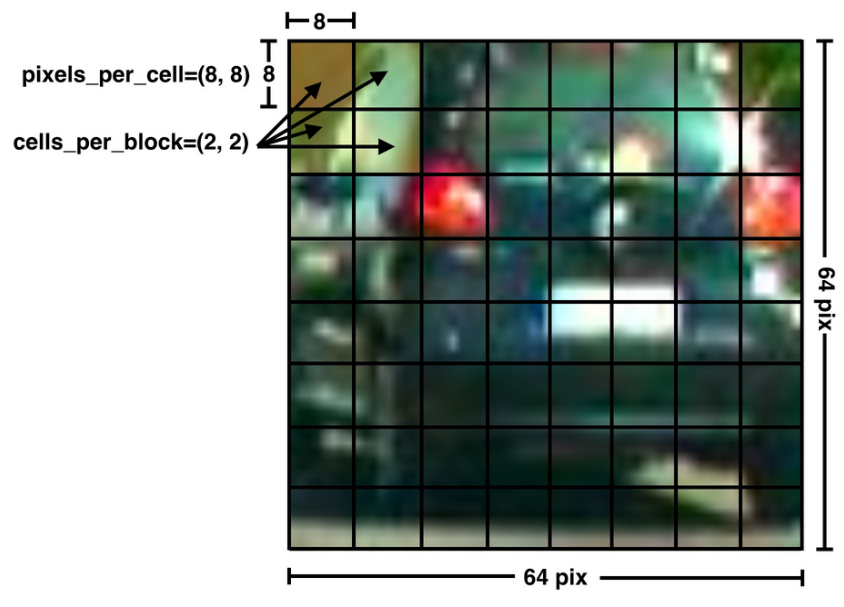

This is where things get a little confusing though. Let's say you are computing HOG features for an image like the one shown above that is 64×6464 pixels. If you set pixels_per_cell=(8, 8) and cells_per_block=(2, 2) and orientations=9. How many elements will you have in your HOG feature vector for the entire image?

You might guess the number of orientations times the number of cells, or 9×8×8=5769=576, but that's not the case if you're using block normalization! In fact, the HOG features for all cells in each block are computed at each block position and the block steps across and down through the image cell by cell. 

The actual number of features in your final feature vector will be the total number of block positions multiplied by the number of cells per block, times the number of orientations, or in the case shown above: 7×7×2×2×9=17647 

For the example above, I would call the hog() function on a single color channel img like this:

In [27]:
img=mpimg.imread('../img/code/000280.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
from skimage.feature import hog
pix_per_cell = 8
cell_per_block = 2
orient = 9

hog_features, hog_image = hog(gray, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=False,
                          block_norm="L2-Hys")

The visualise=True flag tells the function to output a visualization of the HOG feature computation as well, which we're calling hog_image in this case. If I take a look at a single color channel for a car image, and its corresponding HOG visulization, they look like this:

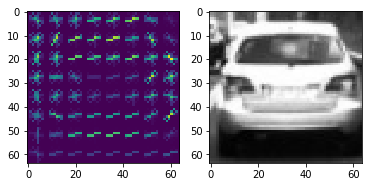

In [68]:
plt.subplot(121)
plt.imshow(hog_image)
plt.subplot(122)
plt.imshow(gray,cmap='gray')


The HOG visualization is not actually the feature vector, but rather, a representation that shows the dominant gradient direction within each cell with brightness corresponding to the strength of gradients in that cell, much like the "star" representation in the lesson. 

If I look at the hog_features output, I'll find it's an array of shape 7×7×2×2×9. This corresponds to the fact that a grid of 7×7 blocks were sampled, with 2×2 cells in each block and 9 orientations per cell. I can unroll this array into a feature vector using features.ravel(), which yields, in this case, a one dimensional array of length 1764

In [29]:
hog_features.shape

(7, 7, 2, 2, 9)

In [30]:
hog_features_vec=hog_features.ravel()
hog_features_vec.shape

(1764,)

Alternatively, you can set the feature_vector=True flag when calling the hog() function to automatically unroll the features.

 In the end project, it could be useful to have a function defined that I could pass an image to with specifications for orientations, pixels_per_cell, and cells_per_block, as well as flags set for whether or not I want the feature vector unrolled and/or a visualization image, so let's write it!

In [52]:
def get_hog_features(img,orient,pix_per_cell,cell_per_block,vis=True,feature_vec=True):
    return_list=hog(img,orient,pixels_per_cell=(pix_per_cell,pix_per_cell),cells_per_block=(cell_per_block,cell_per_block),block_norm='L2-Hys',transform_sqrt=False,visualise=vis,feature_vector=feature_vec)
    hog_features=return_list[0]
    if vis:
        hog_image=return_list[1]
        return hog_features,hog_image
    else:
        return hog_features
    

In [65]:
car_images=glob.glob('../img/code/*.jpg')
ind=np.random.randint(0,len(car_images))
image=mpimg.imread(car_images[ind])
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [66]:
# Call our function with vis=True to see an image output
features,hog_image=get_hog_features(gray,orient=9,pix_per_cell=8,cell_per_block=2,vis=True,feature_vec=False)

Text(0.5,1,'HOG Visualization')

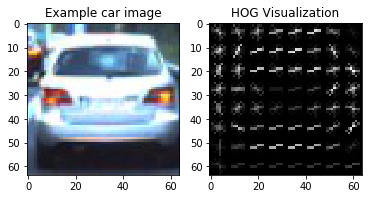

In [67]:
fig=plt.figure()
plt.subplot(121)
plt.imshow(image,cmap='gray')
plt.title('Example car image')
plt.subplot(122)
plt.imshow(hog_image,cmap='gray')
plt.title('HOG Visualization')